# Jumpman23 -- New Market Analysis

## Background
Jumpman23 is an on-demand delivery platform connecting “Jumpmen” and customers purchasing a variety of goods. Jumpman23 will send Jumpmen to merchants to purchase and pickup any items requested by the customer. Whenever possible, Jumpman23 will order the requested items ahead to save the Jumpmen time. Each time a Jumpman23 delivery is completed, a record is saved to the Jumpman23 database that contains information about that delivery. Jumpman23 is growing fast and has just launched in its newest market -- New York City.


## Challenge
The CEO of Jumpman23 has just asked you “how are things going in New York”. He has mentioned to you that he’s heard reports of data integrity issues. Please think through the CEO’s ask and present to both the CEO and the CTO, in any format you choose, an analysis of the market. In addition, dive into the reports on data integrity issues and if they indeed exist, outline where they may be and how they may impact the analysis. The CEO is a visual learner, the CTO loves to see code and technical work, and both are obsessed with maps.

## Read Data

In [24]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium import plugins
from folium import Map
from folium.plugins import HeatMap

import warnings; warnings.simplefilter('ignore')
market = pd.read_csv('analyze_me.csv')

## Navigate the dataset

● The dataset has 18 attributes and 5983 records. The primary key is the combination for delivery_id, customer_id, jumpman_id and item_name. In other words, the dataset is recorded by item. The table overall contains restaurant, delivery, and order information. 
<br><br>
● Some data format in the datasets are not expected; hence, data preprocessing is needed. Also, new features will be generated in order to show the performance of the business. 

In [25]:
market.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595


In [26]:
#how many unique values each column has?
market.nunique()

delivery_id                            5214
customer_id                            3192
jumpman_id                              578
vehicle_type                              7
pickup_place                            898
place_category                           57
item_name                              2277
item_quantity                            11
item_category_name                      767
how_long_it_took_to_order              2579
pickup_lat                             1210
pickup_lon                             1179
dropoff_lat                            2841
dropoff_lon                            2839
when_the_delivery_started              5214
when_the_Jumpman_arrived_at_pickup     4719
when_the_Jumpman_left_pickup           4717
when_the_Jumpman_arrived_at_dropoff    5214
dtype: int64

In [27]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 18 columns):
delivery_id                            5983 non-null int64
customer_id                            5983 non-null int64
jumpman_id                             5983 non-null int64
vehicle_type                           5983 non-null object
pickup_place                           5983 non-null object
place_category                         5100 non-null object
item_name                              4753 non-null object
item_quantity                          4753 non-null float64
item_category_name                     4753 non-null object
how_long_it_took_to_order              3038 non-null object
pickup_lat                             5983 non-null float64
pickup_lon                             5983 non-null float64
dropoff_lat                            5983 non-null float64
dropoff_lon                            5983 non-null float64
when_the_delivery_started              5983 non-nul

In [28]:
market.describe

<bound method NDFrame.describe of       delivery_id  customer_id  jumpman_id vehicle_type  \
0         1457973       327168      162381          van   
1         1377056        64452      104533      bicycle   
2         1476547        83095      132725      bicycle   
3         1485494       271149      157175      bicycle   
4         1327707       122609      118095      bicycle   
...           ...          ...         ...          ...   
5978      1360750       378035      151467      bicycle   
5979      1348697        96943        3296      bicycle   
5980      1274438       355090      153113      bicycle   
5981      1470282       400983      142140          car   
5982      1357449       128517      134189          car   

                     pickup_place  place_category  \
0                       Melt Shop        American   
1             Prince Street Pizza           Pizza   
2                      Bareburger          Burger   
3                     Juice Press       Juice

## Data Integrity

From the below checks, here are some data integrity issue that were found:

1. Please see the below missing numbers in each column. We are missing half of the information on how long it takes customers to order, and about 20% of the information on what customer actually ordered. Efforts must be put on improving the data integrity of the below columns, Or the business insights that's generated by the datasets will be biased. 
<br>
<br>

| Column Names | Number of Missing Values |
| --- | --- |
|how_long_it_took_to_order              |2945|
|item_name                              |1230|
|item_quantity                          |1230|
|item_category_name                     |1230|
|place_category                          |883|
|when_the_Jumpman_arrived_at_pickup      |550|
|when_the_Jumpman_left_pickup            |550|

<br>
2. As mentioned above, The primary key is the combination of delivery_id, customer_id, jumpman_id and item_name, which means the dataset is recorded by item. However, around 20% of the item_name are missing. From database design/maintainance perspective, datasets based on delivery would be a better choice. In other words, delivery_id should be unique id and primary id in the table.

<br>
<br>
3. Inappropriate data format can be found in the datasets. For example, timestamp are wrongly stored as object.

In [29]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 18 columns):
delivery_id                            5983 non-null int64
customer_id                            5983 non-null int64
jumpman_id                             5983 non-null int64
vehicle_type                           5983 non-null object
pickup_place                           5983 non-null object
place_category                         5100 non-null object
item_name                              4753 non-null object
item_quantity                          4753 non-null float64
item_category_name                     4753 non-null object
how_long_it_took_to_order              3038 non-null object
pickup_lat                             5983 non-null float64
pickup_lon                             5983 non-null float64
dropoff_lat                            5983 non-null float64
dropoff_lon                            5983 non-null float64
when_the_delivery_started              5983 non-nul

In [30]:
market.isnull().sum()

delivery_id                               0
customer_id                               0
jumpman_id                                0
vehicle_type                              0
pickup_place                              0
place_category                          883
item_name                              1230
item_quantity                          1230
item_category_name                     1230
how_long_it_took_to_order              2945
pickup_lat                                0
pickup_lon                                0
dropoff_lat                               0
dropoff_lon                               0
when_the_delivery_started                 0
when_the_Jumpman_arrived_at_pickup      550
when_the_Jumpman_left_pickup            550
when_the_Jumpman_arrived_at_dropoff       0
dtype: int64

## Data Preprocessing

● Correct inappropriate date format
<br>
● Create additional features: order_wait_time and pickup_wait_time

In [31]:
#change "how_long_it_took_to_order" to timedelta format
market['how_long_it_took_to_order'] = pd.to_timedelta(market['how_long_it_took_to_order'])
market['how_long_it_took_to_order'].dt.floor('s')

0      00:19:58
1      00:25:09
2      00:06:44
3           NaT
4      00:03:45
         ...   
5978        NaT
5979        NaT
5980        NaT
5981   00:02:17
5982   00:09:25
Name: how_long_it_took_to_order, Length: 5983, dtype: timedelta64[ns]

In [32]:
#change the below fields to datetime
market[["when_the_delivery_started","when_the_Jumpman_arrived_at_pickup","when_the_Jumpman_left_pickup","when_the_Jumpman_arrived_at_dropoff"]] = market[["when_the_delivery_started","when_the_Jumpman_arrived_at_pickup","when_the_Jumpman_left_pickup","when_the_Jumpman_arrived_at_dropoff"]].apply(pd.to_datetime)

In [33]:
#Add fields for pickup/order wait times
market['pickup_wait_time'] = (market.when_the_Jumpman_left_pickup - market.when_the_Jumpman_arrived_at_pickup)
market['order_wait_time'] = (market.when_the_Jumpman_arrived_at_dropoff - market.when_the_delivery_started)

## Market Analysis

● On average, it takes customers more than 7 mins and 49 seconds to order. Also, it takes jumpman around 19 mins to wait for the pick up of orders, and additional 46 mins to have it delivered to customers

In [34]:
print(market['pickup_wait_time'].mean())

0 days 00:18:54.965448


In [35]:
market['order_wait_time'].mean()

Timedelta('0 days 00:46:04.870654')

In [36]:
market['how_long_it_took_to_order'].mean()

Timedelta('0 days 00:07:49.173169')

### What's the highest demand during the week/day?

● In order to understand the current demand of the market, I created two new features from "when_the_delivery_started" to see the demand difference during the week and weekend and different times during the day.
<br><br>
● From the chart below, Sunday has the highest demand of food delivery, and Monday has the lowest. It's not hard to find orders are increasing as it gets to the end of the week. 
<br><br>
● The highest demand during the day is around 17:00 to 21:00. Many people start ordering food during the dinner time. Meanwhile, we see another small peak during lunch time around noon.

In [37]:
market['day'] = market.when_the_delivery_started.dt.weekday_name
market['hour'] = market.when_the_delivery_started.dt.hour

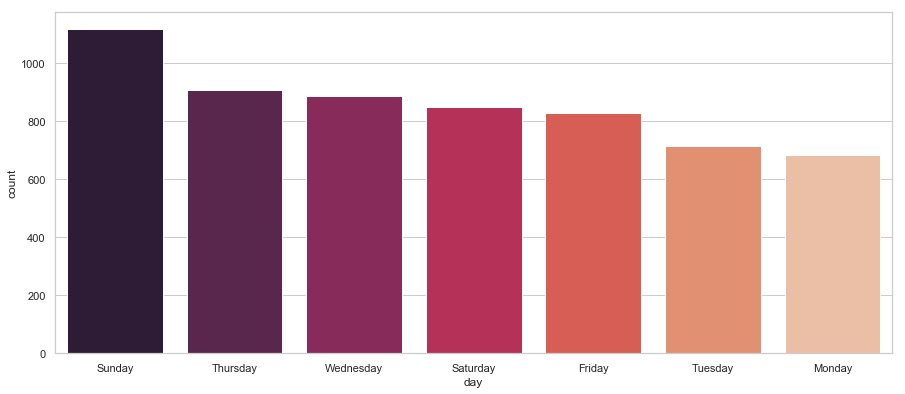

In [38]:

sns.set(rc={'figure.figsize':(15,6.27)})
sns.set(style="whitegrid")
sns.countplot(x="day", data=market,palette="rocket",order = market['day'].value_counts().index)

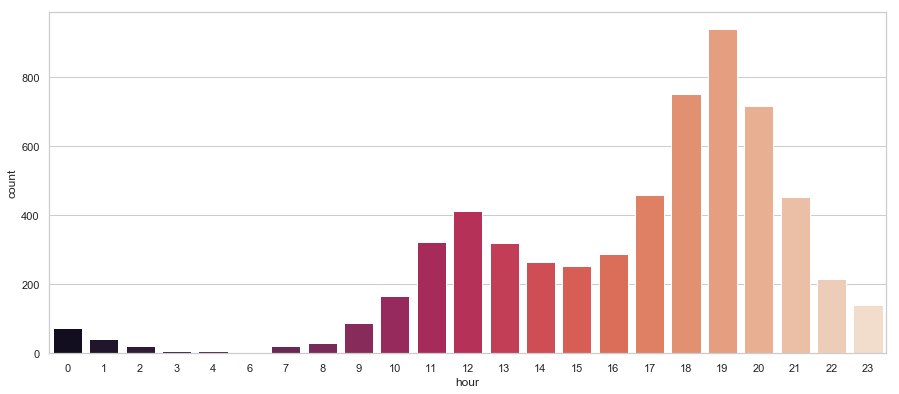

In [39]:
sns.set(rc={'figure.figsize':(15,6.27)})
sns.set(style="whitegrid")
sns.countplot(x="hour", data=market,palette="rocket")

### What's the most popular food/restaurant?

● The top 5 most popular food categories in New York is Italian, Burger, Janpanese, American, and Chinese. 
<br><br>
● The top 5 most popular restaurant that people like to order in New York is Shake Shake, Momofuku Milk Bar, Blue Ribbon Fried Chicken, the Meatball Shop, and Blue Ribbon Sushi.
<br><br>
● The top 5 most popular food categories that people like to order is sides, burgers, appitizers, fries, cookies.

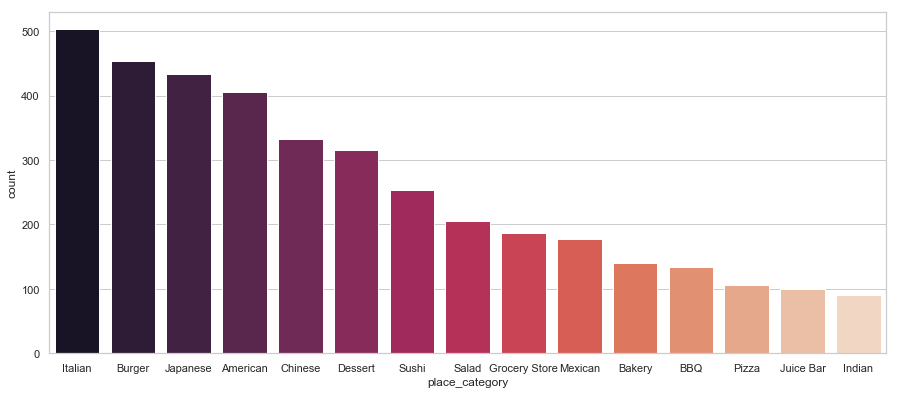

In [40]:
sns.countplot(x="place_category", data=market,palette="rocket",order=market.place_category.value_counts().iloc[:15].index)

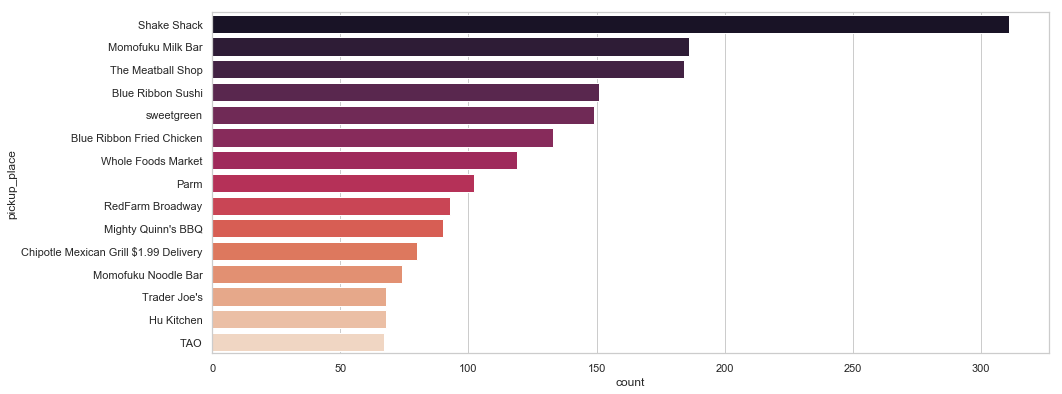

In [41]:
sns.countplot(y="pickup_place", data=market,palette="rocket",order=market.pickup_place.value_counts().iloc[:15].index)

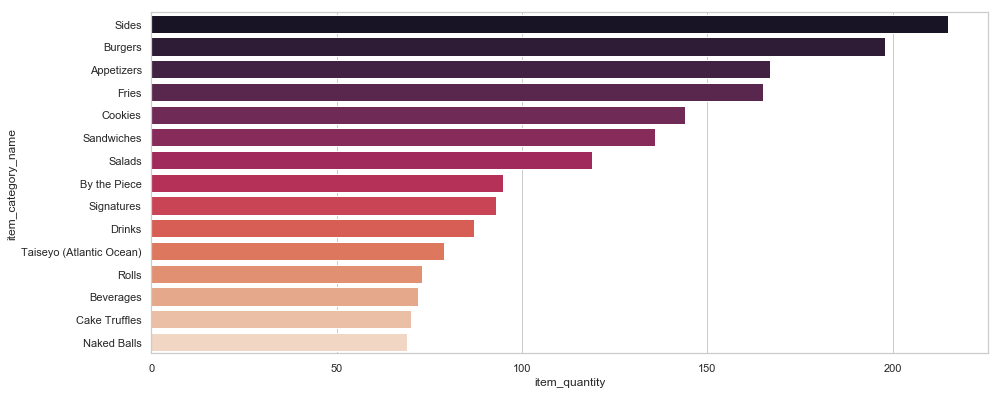

In [42]:
category_sum = market.groupby('item_category_name').sum().sort_values('item_quantity',ascending=False).head(15).reset_index()
sns.barplot(x="item_quantity", y='item_category_name', data=category_sum,palette="rocket")

● Most of the delivery is done by Bicycle, some of the delivery is done by car. 

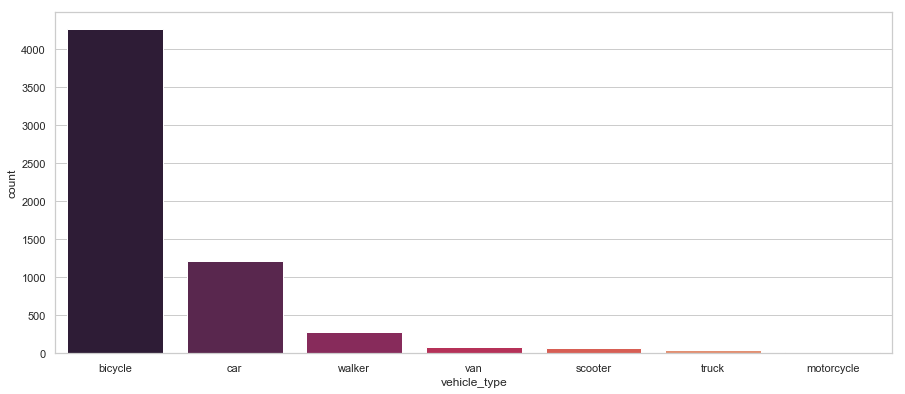

In [43]:
sns.countplot(x = 'vehicle_type', data = market,palette="rocket",order = market['vehicle_type'].value_counts().index)

## What's the main area of the take out place and delivery destination?

● The below heatmap shows the how's the business spread out in NYC. The uper one shows the pick up location, and the lower one shows the delivery location.
<br><br>
● The most popular places are lower Manhatton (especially impacted by East Village, Chinatown and Financial District), midtown around Time Square, and Upper West and Upper East Side. Also, it's popular in Queens and Brooklyn areas.
<br><br>
● The delivery locations heatmap compared to pickup locations are more spread out, and most order requests comes from lower Manhattan and Midtown.

In [44]:
hmap1 = Map(location=[40.767937,-73.982155], control_scale=True, zoom_start=12)
hmap2 = Map(location=[40.767937,-73.982155], control_scale=True, zoom_start=12)

In [45]:
#map of pick up location
heatmap_layer = HeatMap(list(zip(market.pickup_lat.values, market.pickup_lon.values)), 
                radius=12)
heatmap_layer.add_to(hmap1)
hmap1

In [46]:
#map of deliverys location
heatmap_layer = HeatMap(list(zip(market.dropoff_lat.values, market.dropoff_lon.values)), 
                radius=12)
heatmap_layer.add_to(hmap2)
hmap2

# Next Steps:

A lot of things can be done next, here are some examples:
1. Fix the data quality/integrity issues mentioned above. Only in this case we can get an accurate insights from the data.
<br><br>
2. Algorithms for Jumpman allocation needs to be improved. Current avarage waiting time for Jumpman is 19 minutes, which is a area that I personally can see huge improvement. Also, 46 mins on delivery can be potentially hugely improved as well.
<br><br>
3. Since the most popular food types are sides/appetizers, we could encourage all restaurants add additional options under sides/appetizers as people tend to order it with main courses.
<br><br>
4. Currently, most of the delivery is done by bycicles. Furture investigation need to take to see if this is the most effecient way of delivery. We can take a look at the time spend on delivery in different areas car vs. bicycles under the same distance.
<br><br>
5. Furthur study can be done to investigate our customer retention rate to see what kind customers are churning. In general, the goal is to retain the existing customers and obtain new customers. If customer segmentation information can be provided that would be great. 